### Gain insight into data
- load data
- check for missing values

In [27]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

In [11]:
df_o = pd.read_csv('observations.csv')

In [17]:
df_o.head()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [18]:
print(df_o.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [50]:
# Missing Values
print(df_o.isnull().sum())
df_o = df_o.dropna() # drop rows with missing values

scientific_name    0
park_name          0
observations       0
dtype: int64


In [51]:
# Duplicates
print(df_o.duplicated().sum())
duplicates = df_o[df_o.duplicated()] 
print(duplicates)

15
              scientific_name                            park_name  \
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arctium minus               Yosemite National Park   
12381    Eleocharis palustris  Great Smoky Mountains National Park   
13372     Hesperis matronalis                  Bryce National Park   
16741       Prunella vulgaris  Great Smoky Mountains National Park   
17378    Potentilla norvegica               Yosemite National Park   
17577      Spilogale putorius            Yellowstone National Park   
18141           Poa compressa  Great Smoky Mountains National Park   
19392       Cichorium intybus            Yellowstone National Park   
20294  Botrychium virginianum            Yellowstone National Park   
20820    Monotropa hypopithys  Great Smoky Mountains National Park   
21151     Trifoli

<Axes: xlabel='park_name', ylabel='observations'>

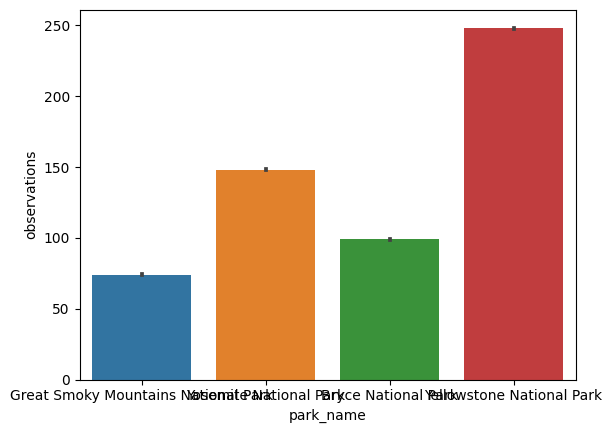

In [52]:
# Initital Visualizations
sns.barplot(data=df_o, x='park_name', y='observations')


In [53]:
# px.bar(df, x='park_name', y='observations', title='Observations per Park', labels={'observations':'Number of Observations', 'park_name':'Park Name'})
# y tick labels
park_count_fig = px.histogram(df_o, x='park_name', y='observations', title='Observations per Park', labels={'observations':'Number of Observations', 'park_name':'Park Name'})
park_count_fig.show()


In [57]:
df_o_sum_name = pd.DataFrame(df_o.groupby('scientific_name')['observations'].sum()).reset_index()
df_o_sum_name.head()

,scientific_name,observations
0,Abies bifolia,532
1,Abies concolor,630
2,Abies fraseri,518
3,Abietinella abietina,592
4,Abronia ammophila,523


In [59]:
name_count_fig = px.histogram(df_o_sum_name, x='scientific_name', y='observations', title="Observations per plant", labels={'scientific_name':'Plant Name', 'observations':'Number of Observations'})
name_count_fig.update_xaxes(categoryorder='total descending')
name_count_fig.update_traces(x=df_o_sum_name['scientific_name'].value_counts().index[:6])
name_count_fig.show()